In [1]:
%load_ext autoreload
%autoreload 2
from spectraltree import *
from compare_methods import *

In [2]:
import numpy as np
import dendropy

In [3]:
jc = Jukes_Cantor()
tree = balanced_binary(2**5, edge_length=jc.p2t(0.85))
observations = simulate_sequences(1_000, tree, jc)

In [4]:
distance_matrix = JC_distance_matrix(observations)
recovered_tree = estimate_tree_topology(distance_matrix)

In [5]:
print(recovered_tree.as_ascii_plot())

/--------------------------------------------------------------------------- 2 
|                                                                              
|--------------------------------------------------------------------------- 3 
|                                                                              
|                                                                 /--------- 0 
|        /--------------------------------------------------------+            
|        |                                                        \--------- 1 
|        |                                                                     
+        |                                                        /--------- 6 
|        |                                               /--------+            
|        |                                               |        \--------- 7 
|        |         /-------------------------------------+                     
|        |         |                    

In [14]:
binary_trees = [balanced_binary(m) for m in [64, 128, 256]]
jc = Jukes_Cantor()
Ns = [100, 400, 1600, 3200]
methods = [Reconstruction_Method()]
mutation_rates = [jc.p2t(0.85)]
results = experiment(binary_trees, jc, Ns, methods, mutation_rates, reps_per_tree=4, savepath="largeM_exp.pkl")

==== Beginning Experiment =====
	 Transition:  Jukes Cantor
	 3 trees
	 4 sample sizes: 100 400 1600 3600
	 1 methods sv2
	 1 mutation rates: 0.1674
	 4 reps
1 / 48
2 / 48
3 / 48
4 / 48
5 / 48
6 / 48
7 / 48
8 / 48
9 / 48
10 / 48
11 / 48
12 / 48
13 / 48
14 / 48
15 / 48
16 / 48
17 / 48
18 / 48
19 / 48
20 / 48
21 / 48
22 / 48
23 / 48
24 / 48
25 / 48
26 / 48
27 / 48
28 / 48
29 / 48
30 / 48
31 / 48
32 / 48
33 / 48
34 / 48
35 / 48
36 / 48
37 / 48
38 / 48
39 / 48
40 / 48
41 / 48
42 / 48
43 / 48
44 / 48
45 / 48
46 / 48
47 / 48
48 / 48
Successfully read 1 files.
Saved to data/largeM_exp.pkl


In [25]:
experiment(binary_trees, jc, [6400], methods, mutation_rates, reps_per_tree=4, savepath="largeM_exp.pkl")
experiment(binary_trees, jc, [12800], methods, mutation_rates, reps_per_tree=8, savepath="largeM_exp.pkl")

==== Beginning Experiment =====
	 Transition:  Jukes Cantor
	 3 trees
	 1 sample sizes: 6400
	 1 methods sv2
	 1 mutation rates: 0.1674
	 4 reps
1 / 12
2 / 12
3 / 12
4 / 12
5 / 12
6 / 12
7 / 12
8 / 12
9 / 12
10 / 12
11 / 12
12 / 12
Successfully read 1 files.
Saved to data/largeM_exp.pkl
==== Beginning Experiment =====
	 Transition:  Jukes Cantor
	 3 trees
	 1 sample sizes: 12800
	 1 methods sv2
	 1 mutation rates: 0.1674
	 8 reps
1 / 24
2 / 24
3 / 24
4 / 24
5 / 24
6 / 24
7 / 24
8 / 24
9 / 24
10 / 24
11 / 24
12 / 24
13 / 24
14 / 24
15 / 24
16 / 24
17 / 24
18 / 24
19 / 24
20 / 24
21 / 24
22 / 24
23 / 24
24 / 24
Successfully read 1 files.
Saved to data/largeM_exp.pkl


In [22]:
results = load_results("largeM_exp.pkl")
df = results2frame(results)
len(df)

108

In [40]:
df.groupby(['m', 'n']).count()

transition  method  rate  correct  F1%  RF
m   n                                               
64  100            8       8     8        8    8   8
    400            8       8     8        8    8   8
    1600           8       8     8        8    8   8
    3600           8       8     8        8    8   8
    6400           4       4     4        4    4   4
128 100            8       8     8        8    8   8
    400            8       8     8        8    8   8
    1600           8       8     8        8    8   8
    3600           8       8     8        8    8   8
    6400           4       4     4        4    4   4
256 100            8       8     8        8    8   8
    400            8       8     8        8    8   8
    1600           8       8     8        8    8   8
    3600           8       8     8        8    8   8
    6400           4       4     4        4    4   4

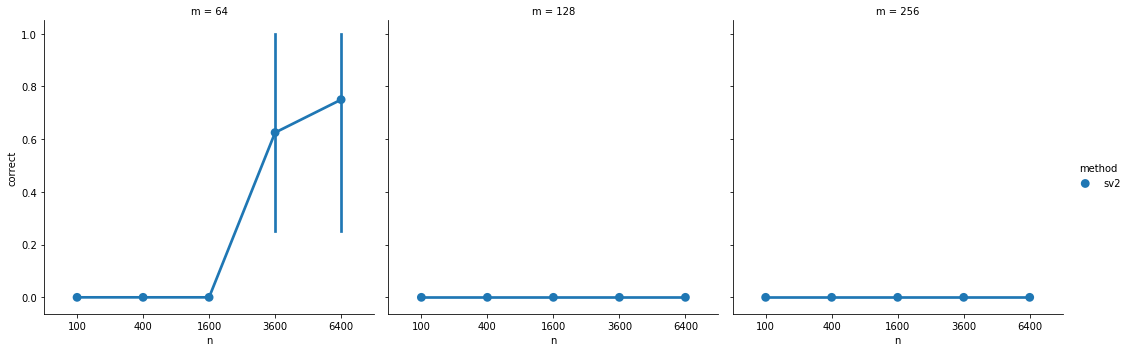

In [26]:
correct(df, col="m")

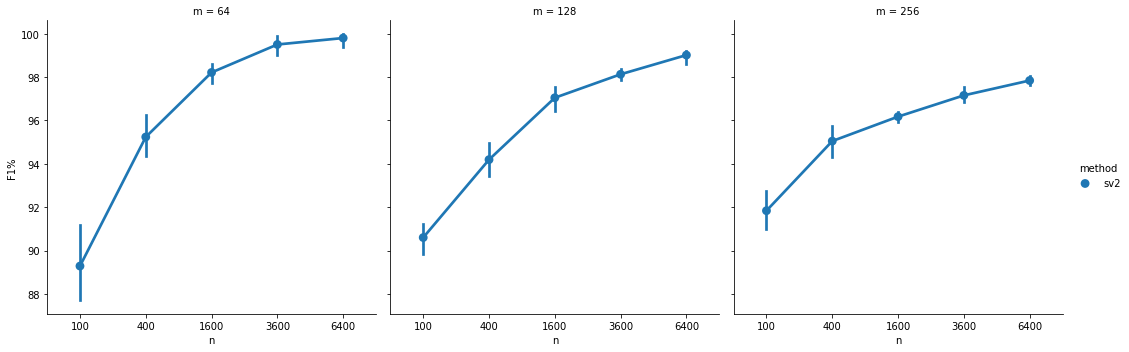

In [24]:
accuracy(df, col="m")